In [1]:
import pandas as pd
import numpy as np

import random

import pickle
from sklearn.externals import joblib

from sklearn.preprocessing import scale, StandardScaler

from sklearn.cross_validation import train_test_split, cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import precision_score, recall_score, classification_report
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve

import statsmodels.api as sm

import matplotlib.pyplot as plt
import seaborn as sb
import math

%matplotlib inline

In [2]:
with open('master_data.pkl','rb') as picklefile:
    df = pickle.load(picklefile)

In [3]:
def indicator(x):
    if x >= 0.66:
        return 1
    else:
        return 0

In [4]:
df['target'] = df['share_uber'].apply(indicator)

In [8]:
df.target.sum()/len(df)

0.2698492462311558

In [9]:
df.columns

Index(['GEOID', 'share_uber', 'airbnb_accommodates', 'airbnb_bathrooms',
       'airbnb_bedrooms', 'airbnb_beds', 'airbnb_dailyrate',
       'airbnb_number_of_reviews', 'airbnb_review_scores_location',
       'airbnb_review_scores_rating', 'airbnb_airbnb_listings',
       'demo_Total Population', 'demo_Total households',
       'demo_family households', 'demo_nonfamily households',
       'demo_income per capita', 'demo_total housing units',
       'demo_owner  occupied units', 'demo_median house value',
       'demo_renter occupied units', 'demo_median rent',
       'demo_transportation car', 'demo_number of cars',
       'demo_transportation public', 'demo_tranportation motorcycle',
       'demo_transportation bicyle', 'demo_transportation walk',
       'demo_ Same house 1 year ago',
       'demo_ Different house in United States 1 year ago',
       'demo_abroad_1_year_ago', 'demo_ Bachelor's degree',
       'demo_ Master's degree', 'demo_ Professional school degree',
       'demo_ D

In [10]:
target = df.target
df = df.drop(['target',
              'GEOID',
              'share_uber'],axis=1)

In [11]:
features = df

In [12]:
features['RANDOM'] = [random.random() for i in range(len(features))]
features.head()

,airbnb_accommodates,airbnb_bathrooms,airbnb_bedrooms,airbnb_beds,airbnb_dailyrate,airbnb_number_of_reviews,airbnb_review_scores_location,airbnb_review_scores_rating,airbnb_airbnb_listings,demo_Total Population,...,demo_ Doctorate degree,demo_ Median monthly housing costs,complaint_count,yelp_bar_rating,yelp_bar_review_count,yelp_bar_bar_count,yelp_bar_GEOID,yelp_bar_coffee_count,5_year_change,RANDOM
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5095.0,...,0.0,1462.0,170.0,0.0,0.0,0.0,0.0,0.0,-0.930070,0.506293
2,3.000000,0.944444,1.333333,1.888889,107.777778,2.888889,9.0,86.0,9.0,5572.0,...,8.0,1918.0,244.0,9.5,5.0,2.0,0.0,0.0,-0.740385,0.814856
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,5412.0,...,0.0,988.0,548.0,0.0,0.0,0.0,0.0,0.0,-0.804511,0.784987
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,2569.0,...,6.0,1111.0,13.0,0.0,0.0,0.0,0.0,0.0,-0.859873,0.812898
5,5.333333,1.000000,2.333333,5.666667,83.333333,7.666667,9.0,96.5,3.0,8959.0,...,12.0,684.0,1290.0,0.0,0.0,0.0,0.0,0.0,-0.764045,0.140331


In [13]:
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.3,random_state=42)

In [15]:
X_train = scale(X_train)
X_test = scale(X_test)

In [20]:
models = {}

models['KNN'] = KNeighborsClassifier()
models['LR'] = LogisticRegression()
models['SVC'] = SVC()
models['DecisionTree'] = DecisionTreeClassifier()
models['GradientBoost'] = GradientBoostingClassifier()
models['AdaBoost'] = AdaBoostClassifier()
models['RandomForest'] = RandomForestClassifier()

# RFparams = {n_estimators=1000,n_jobs=4, max_features=5,
#               class_weight='balanced_subsample',max_depth=10}

In [21]:
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, n_jobs=1, cv = 10)
    precision = cross_val_score(model, X_train, y_train, cv=10, scoring='precision')
    recall = cross_val_score(model, X_train, y_train, cv=10, scoring='recall')
    f1 = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')
    print('Model: ' + name)
    print('Accuracy: ' + str(np.mean(scores)))
    print('Precision: ' + str(np.mean(precision)))
    print('Recall: ' + str(np.mean(recall)))
    print('f1: ' + str(np.mean(f1)))
    print("")

Model: RandomForest
Accuracy: 0.810445060101
Precision: 0.74184740427
Recall: 0.427453769559
f1: 0.54311279794

Model: KNN
Accuracy: 0.786775920878
Precision: 0.653927646041
Recall: 0.464366998578
f1: 0.538353539679

Model: LR
Accuracy: 0.806883909022
Precision: 0.730105273009
Recall: 0.469701280228
f1: 0.564250284375

Model: DecisionTree
Accuracy: 0.733671671359
Precision: 0.521418155591
Recall: 0.532716927454
f1: 0.527971451893

Model: SVC
Accuracy: 0.801853299969
Precision: 0.772370787024
Recall: 0.388051209104
f1: 0.50925754515

Model: AdaBoost
Accuracy: 0.801832372611
Precision: 0.669416943919
Recall: 0.540896159317
f1: 0.594724240626

Model: GradientBoost
Accuracy: 0.827644592401
Precision: 0.770932479405
Recall: 0.517140825036
f1: 0.611797930207



In [31]:
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)    
    print('Model: ' + name)
    print(classification_report(y_test,y_pred))
    print("")

Model: RandomForest
             precision    recall  f1-score   support

          0       0.80      0.95      0.87       439
          1       0.69      0.34      0.46       158

avg / total       0.77      0.79      0.76       597


Model: KNN
             precision    recall  f1-score   support

          0       0.81      0.91      0.86       439
          1       0.62      0.41      0.49       158

avg / total       0.76      0.78      0.76       597


Model: LR
             precision    recall  f1-score   support

          0       0.82      0.93      0.88       439
          1       0.71      0.44      0.54       158

avg / total       0.79      0.80      0.79       597


Model: DecisionTree
             precision    recall  f1-score   support

          0       0.83      0.79      0.81       439
          1       0.48      0.54      0.51       158

avg / total       0.73      0.72      0.73       597


Model: SVC
             precision    recall  f1-score   support

          

In [66]:
def pr_curve(truthvec, scorevec, digit_prec=2):
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(precisionvec,recallvec,label=name)
    plt.legend()
    plt.axis([0, 1, 0, 1])
    plt.xlabel("Precision")
    plt.ylabel("Recall")
    return (recallvec, precisionvec, threshvec)

In [67]:
models_roc = {}

models_roc['KNN'] = KNeighborsClassifier()
models_roc['LR'] = LogisticRegression()
models_roc['DecisionTree'] = DecisionTreeClassifier()
models_roc['GradientBoost'] = GradientBoostingClassifier()
models_roc['AdaBoost'] = AdaBoostClassifier()
models_roc['RandomForest'] = RandomForestClassifier()

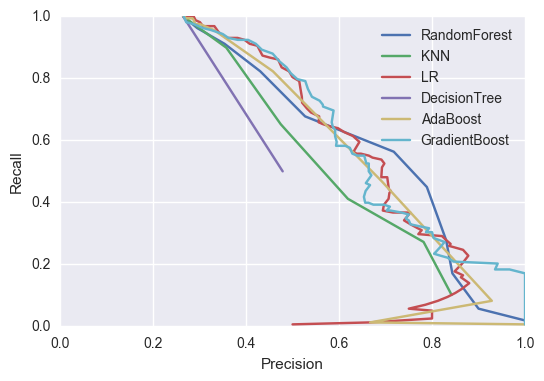

In [68]:
for name, model in models_roc.items():
    model.fit(X_train, y_train)
    recallvec, precisionvec, threshvec = pr_curve(y_test,model.predict_proba(X_test)[:,1])

Model:  RandomForest
0.784694789654

Model:  KNN
0.762521265246

Model:  LR
0.831377411263

Model:  DecisionTree
0.642556443009

Model:  AdaBoost
0.826165623829

Model:  GradientBoost
0.829431100603



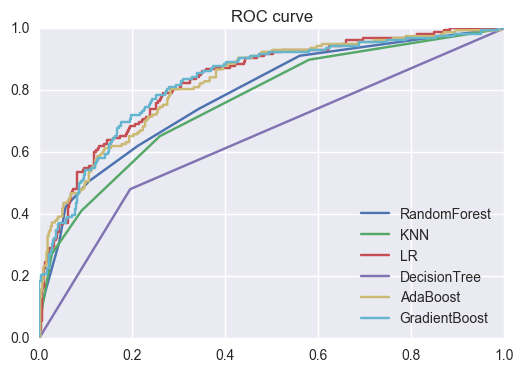

In [62]:
for name, model in models_roc.items():
    model.fit(X_train, y_train)
    y_pred = np.asarray(model.predict_proba(X_test)[:,1])
    fpr, tpr, thresholds = roc_curve(np.asarray(y_test),y_pred)
    plt.plot(fpr, tpr, label=name)
    plt.legend(loc='lower right')
    plt.title('ROC curve')
    print('Model: ', name)
    print(roc_auc_score(y_test,y_pred))
    print("")

### Feature importance

In [71]:
models_fi = {}

models_fi['DecisionTree'] = DecisionTreeClassifier()
models_fi['GradientBoost'] = GradientBoostingClassifier()
models_fi['AdaBoost'] = AdaBoostClassifier()
models_fi['RandomForest'] = RandomForestClassifier()

In [72]:
for name, model in models_fi.items():
    model.fit(X_train, y_train)
    sorted_features = sorted(zip(features,model.feature_importances_), key=lambda tup: abs(tup[1]), reverse=True)
    print('Model: ',name)
    for feature in sorted_features:
        print(feature)
    
    print("")

Model:  DecisionTree
('demo_income per capita', 0.10678216429603644)
('complaint_count', 0.10017516564954376)
('airbnb_airbnb_listings', 0.075659493310391415)
('demo_ Median monthly housing costs', 0.051078417490591048)
('demo_owner  occupied units', 0.045717437932324162)
('demo_transportation walk', 0.043773789204834913)
('demo_median rent', 0.042169914124395649)
('demo_median house value', 0.03864545028205664)
('airbnb_dailyrate', 0.036978800889253122)
('RANDOM', 0.036622982475800411)
('demo_ Doctorate degree', 0.036440271427474774)
('airbnb_number_of_reviews', 0.034579468006739549)
('yelp_bar_GEOID', 0.028950490462797605)
('demo_ Different house in United States 1 year ago', 0.024850763905789167)
('demo_number of cars', 0.023952518800834786)
('demo_transportation bicyle', 0.022367744011263652)
('demo_renter occupied units', 0.021096889372293832)
('airbnb_accommodates', 0.020262000538296753)
('airbnb_review_scores_rating', 0.019598525497903863)
('demo_ Professional school degree', 0.

In [75]:
t_reg = sm.Logit(y_train,X_train).fit_regularized(alpha=0.1,maxiter=10000,
                                                 qc_verbose=True, trim_mode='size',
                                                size_trim_tol =0.1)
t_reg.summary()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.571494623864
            Iterations: 366
            Function evaluations: 366
            Gradient evaluations: 366
QC check did not pass for 1 out of 41 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
------ Recall the problem was rescaled by 1 / nobs ---
|passed    |alpha     |fprime    |param     |
--------------------------------------------
|True      |7.179e-05 |-7.183e-05|2.829e-01 |
|True      |7.179e-05 |7.181e-05 |-1.119e-01|
|True      |7.179e-05 |7.215e-05 |-2.734e-01|
|True      |7.179e-05 |-7.170e-05|3.111e-02 |
|True      |7.179e-05 |-7.125e-05|7.713e-02 |
|True      |7.179e-05 |-7.216e-05|7.502e-02 |
|True      |7.179e-05 |-7.209e-05|8.376e-01 |
|True      |7.179e-05 |7.182e-05 |-9.902e-01|
|True      |7.179e-05 |7.196e-05 |-7.534e-01|
|True      |7.179e-05 |-7.102e-05|1.788e+00 |
|False     |7.179e-05 |7.810e-05 |-6.370e-0

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:                 1393
Model:                          Logit   Df Residuals:                     1363
Method:                           MLE   Df Model:                           29
Date:                Thu, 27 Oct 2016   Pseudo R-squ.:                 0.02138
Time:                        20:54:33   Log-Likelihood:                -797.91
converged:                       True   LL-Null:                       -815.34
                                        LLR p-value:                    0.2091
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.2829      0.136      2.082      0.037         0.017     0.549
x2            -0.1119      0.134     -0.837      0.402        -0.374     0.150
x3            -0.2734      0.151     -1.812      0.070        -0.569     0.022
x4                  0        nan        nan        nan           nan       nan
x5                  0        nan        nan        nan           nan       nan
x6                  0        nan        nan        nan           nan       nan
x7             0.8376      0.504      1.663      0.096        -0.149     1.825
x8            -0.9902      0.501     -1.978      0.048        -1.971    -0.009
x9            -0.7534      0.154     -4.883      0.000        -1.056    -0.451
x10            1.7881      0.686      2.607      0.009         0.444     3.133
x11           -0.6370   6.21e+06  -1.03e-07      1.000     -1.22e+07  1.22e+07
x12           -0.6373   3.05e+06  -2.09e-07      1.000     -5.97e+06  5.97e+06
x13           -0.3569      4e+06  -8.93e-08      1.000     -7.83e+06  7.83e+06
x14            0.1759      0.152      1.155      0.248        -0.123     0.474
x15            1.2842      0.776      1.655      0.098        -0.237     2.805
x16                 0        nan        nan        nan           nan       nan
x17           -0.3345      0.086     -3.881      0.000        -0.503    -0.166
x18            0.6309      0.291      2.167      0.030         0.060     1.202
x19            0.1798      0.125      1.439      0.150        -0.065     0.425
x20                 0        nan        nan        nan           nan       nan
x21                 0        nan        nan        nan           nan       nan
x22            0.3076      0.268      1.148      0.251        -0.217     0.833
x23                 0        nan        nan        nan           nan       nan
x24           -0.2370      0.093     -2.546      0.011        -0.420    -0.055
x25           -0.1128      0.152     -0.740      0.459        -0.412     0.186
x26           -1.2695      0.649     -1.957      0.050        -2.541     0.002
x27                 0        nan        nan        nan           nan       nan
x28           -0.3831      0.415     -0.924      0.356        -1.196     0.430
x29           -0.1013      0.243     -0.417      0.676        -0.577     0.374
x30           -0.4176      0.231     -1.808      0.071        -0.870     0.035
x31                 0        nan        nan        nan           nan       nan
x32           -0.1180      0.123     -0.961      0.337        -0.359     0.123
x33           -0.2328      0.132     -1.769      0.077        -0.491     0.025
x34            0.6054      0.118      5.118      0.000         0.374     0.837
x35            0.2151      1.191      0.181      0.857        -2.120     2.550
x36            0.3319      0.140      2.368      0.018         0.057     0.607
x37           -0.3730      1.131     -0.330      0.742        -2.590     1.844
x38            0.1113      0.078      1.433      0.152        -0.041     0.263
x3

In [74]:
for f in features.columns:
    print(f)

airbnb_accommodates
airbnb_bathrooms
airbnb_bedrooms
airbnb_beds
airbnb_dailyrate
airbnb_number_of_reviews
airbnb_review_scores_location
airbnb_review_scores_rating
airbnb_airbnb_listings
demo_Total Population
demo_Total households
demo_family households
demo_nonfamily households
demo_income per capita
demo_total housing units
demo_owner  occupied units
demo_median house value
demo_renter occupied units
demo_median rent
demo_transportation car
demo_number of cars
demo_transportation public
demo_tranportation motorcycle
demo_transportation bicyle
demo_transportation walk
demo_ Same house 1 year ago
demo_ Different house in United States 1 year ago
demo_abroad_1_year_ago
demo_ Bachelor's degree
demo_ Master's degree
demo_ Professional school degree
demo_ Doctorate degree
demo_ Median monthly housing costs
complaint_count
yelp_bar_rating
yelp_bar_review_count
yelp_bar_bar_count
yelp_bar_GEOID
yelp_bar_coffee_count
5_year_change
RANDOM


In [ ]:
# get rid of highly correlated features
# grid search RF using method from Ed

In [ ]:
# pr_curve
# https://github.com/th27/nyc16_ds9/blob/master/class_lectures/week05-mcnulty2/day1/Affair_Predictor_Completed.ipynb
# https://github.com/th27/nyc16_ds9/blob/master/class_lectures/week04-mcnulty1/day3/Random%20forest%20Classification.ipynb